# Análisis y Modelo de Predicción de Inundaciones
Este análisis utiliza datos de nivel de río y variables meteorológicas para predecir inundaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
data = pd.read_csv('./datos_modelo_chiriqui.csv')

# Vista inicial
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2801 non-null   int64  
 1   timestamp               2801 non-null   int64  
 2   dia                     2801 non-null   object 
 3   nivel                   2801 non-null   float64
 4   datetime_x              2801 non-null   object 
 5   hour                    2801 non-null   object 
 6   temp                    2801 non-null   float64
 7   feelslike               2801 non-null   float64
 8   dew                     2801 non-null   float64
 9   humidity                2801 non-null   float64
 10  precip                  2801 non-null   float64
 11  precipprob              2801 non-null   int64  
 12  windgust                2801 non-null   float64
 13  windspeed               2801 non-null   float64
 14  winddir                 2801 non-null   

,Unnamed: 0,timestamp,dia,nivel,datetime_x,hour,temp,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,severerisk,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",datetime_y
0,0,1731024000000,2024-11-07 18:00:00,1.14,2024-11-07 18:00:00,2024-11-07 18:00:00,25.0,25.0,24.0,94.19,...,40.1,0.1,0,10,0,1,0,0,0,2024-11-07 18:00:00
1,1,1731024900000,2024-11-07 18:15:00,1.13,2024-11-07 18:15:00,2024-11-07 18:00:00,25.0,25.0,24.0,94.19,...,40.1,0.1,0,10,0,1,0,0,0,2024-11-07 18:00:00
2,2,1731025800000,2024-11-07 18:30:00,1.12,2024-11-07 18:30:00,2024-11-07 18:00:00,25.0,25.0,24.0,94.19,...,40.1,0.1,0,10,0,1,0,0,0,2024-11-07 18:00:00
3,3,1731026700000,2024-11-07 18:45:00,1.10,2024-11-07 18:45:00,2024-11-07 18:00:00,25.0,25.0,24.0,94.19,...,40.1,0.1,0,10,0,1,0,0,0,2024-11-07 18:00:00
4,4,1731027600000,2024-11-07 19:00:00,1.09,2024-11-07 19:00:00,2024-11-07 19:00:00,25.0,25.0,24.0,94.46,...,0.0,0.0,0,10,0,0,0,1,0,2024-11-07 19:00:00


## Análisis Exploratorio
Se analizarán los niveles para determinar un umbral que defina cuándo hay inundaciones.

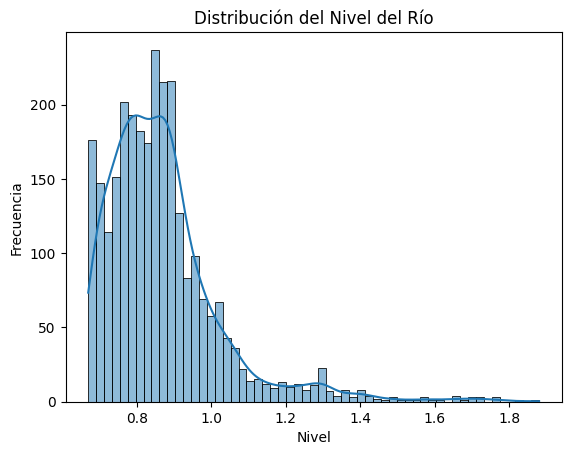

Umbral seleccionado para inundaciones: 1.18


inundacion
0    2660
1     141
Name: count, dtype: int64

In [2]:
# Distribución de la columna 'nivel'
sns.histplot(data['nivel'], kde=True)
plt.title('Distribución del Nivel del Río')
plt.xlabel('Nivel')
plt.ylabel('Frecuencia')
plt.show()

# Determinación automática del umbral (percentil alto)
umbral = np.percentile(data['nivel'], 95)  # Percentil 95 como ejemplo
print(f'Umbral seleccionado para inundaciones: {umbral}')

# Crear una columna binaria para clasificar inundaciones
data['inundacion'] = (data['nivel'] >= umbral).astype(int)
data['inundacion'].value_counts()

## Preparación del Modelo
Se utilizarán variables meteorológicas para predecir inundaciones.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       531
           1       0.92      0.80      0.86        30

    accuracy                           0.99       561
   macro avg       0.96      0.90      0.92       561
weighted avg       0.99      0.99      0.99       561



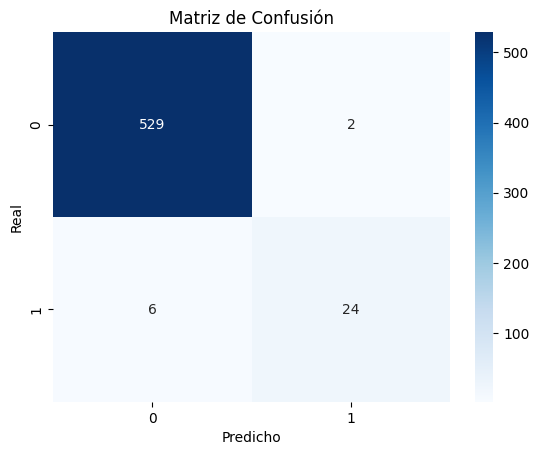

In [3]:
# Selección de variables relevantes
features = ['temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure', 'cloudcover']
X = data[features]
y = data['inundacion']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()